In [2]:
import numpy as np
import os
import dataset_utils as du

from sklearn import svm, metrics
from sklearn.model_selection import train_test_split

# Dataset: PCD Bi(Without ChaosFEX)

In [87]:
import os
x1 = np.load(r"E:\DATASET\pcds_bigram\pcds_bigram_003.npy")
x2 = np.load(r"E:\DATASET\pcds_bigram\pcds_bigram_022.npy")
X = np.append(x1, x2, axis=0)

y = np.load(os.path.join(du.copy_base,'DATASET_bin_Y.npy'))
X_Test = np.load(r"E:\DATASET\pcds_bigram\pcds_bigram_042.npy")

y_Test = np.zeros(len(X_Test), dtype='int32')
y_Test = y_Test + 22
print(y_Test)


print(X.shape, y.shape, X_Test.shape, y_Test.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


[22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22
 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22]
(614, 144) (614,) (43, 144) (43,)
(552, 144) (62, 144) (552,) (62,)


# Dataset: PCD Uni + Bi

Best accuracy = 0.90
Threshold = 0.499
$\epsilon$ = 0.06


In [75]:
x1 = np.load(r"E:\DATASET\pcds\pcds_UniBi_003_022_CFXthres49925eps671.npy")
X = x1[:, :x1.shape[1]//2]

y = np.load(os.path.join(du.copy_base,'DATASET_bin_Y.npy'))
X_Test = np.load(r"E:\DATASET\audio_CFX\pcdsUniBi_042_CFXthres49925eps67.npy")
X_Test = X_Test[:, :X_Test.shape[1]//2]
y_Test = np.zeros(len(X_Test), dtype='int32')
y_Test = y_Test + 22
print(y_Test)


print(X.shape, y.shape, X_Test.shape, y_Test.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

[22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22
 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22]
(614, 624) (614,) (43, 624) (43,)
(552, 624) (62, 624) (552,) (62,)


0.9055771171263677
Classification report for thee classifier: SVC(kernel='linear')
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
          22       1.00      0.56      0.72        43

    accuracy                           0.56        43
   macro avg       0.50      0.28      0.36        43
weighted avg       1.00      0.56      0.72        43
 



    Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.


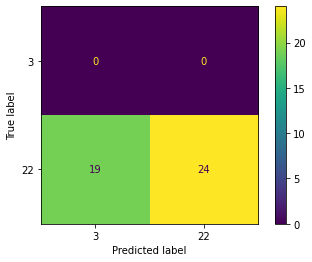

In [34]:

classifier = svm.SVC(kernel='linear')
f1 = []
for iter in range(10):
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    f = metrics.f1_score(y_test, pred, pos_label=y[0])
    f1.append(f)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True)

print(np.array(f1).sum() / len(f1))
predicted = classifier.predict(X_Test)

print("Classification report for thee classifier: %s\n %s \n" %
      (classifier, metrics.classification_report(y_Test, predicted)))

disp = metrics.plot_confusion_matrix(classifier, X_Test, y_Test)

# Dataset: PCD Uni + Bi (Without CFX)

1 files found! 
1 files found! 
1 files found! 
1 files found! 
(614, 12)
(43, 12)
0.8915825773227002
Classification report for thee classifier: SVC(kernel='linear')
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
          22       1.00      0.26      0.41        43

    accuracy                           0.26        43
   macro avg       0.50      0.13      0.20        43
weighted avg       1.00      0.26      0.41        43
 



    Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.


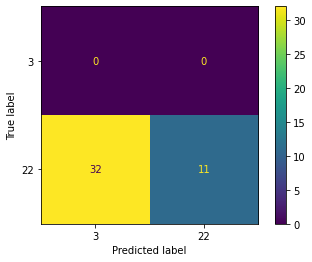

In [61]:
from svm_classifier import get_inputs
x1 = np.load(r"E:\DATASET\pcds\pcds_3_22_unigram.npy")
x2_1files = get_inputs(r"E:\DATASET\pcds_bigram", ('003', ), 'pcds_bigram')
x2_2files = get_inputs(r"E:\DATASET\pcds_bigram", ('022', ), 'pcds_bigram')
x2_1 = np.load(os.path.join(r"E:\DATASET\pcds_bigram", x2_1files[0]))
x2_2 = np.load(os.path.join(r"E:\DATASET\pcds_bigram", x2_2files[0]))
import svm_classifier as sv
path = r"E:\DATASET\note_event_dists"
x3_1file = sv.get_inputs(path, ('003', ), 'ned')
x3_2file = sv.get_inputs(path,('022', ), 'ned')
x3_1 = np.load(os.path.join(path, x3_1file[0]))
x3_2 = np.load(os.path.join(path, x3_2file[0]))
x3 = np.append(x3_1, x3_2, axis=0)
x2 = np.append(x2_1, x2_2, axis=0)
# X = np.append(x1, x2, axis=1)
# X = np.append(X, x3, axis=1)
X = x1
print(X.shape)

x1_Test = np.load(r"E:\DATASET\pcds\pcds_42_unigram.npy")
x2_Test = np.load(r"E:\DATASET\pcds_bigram\pcds_bigram_042.npy")
x3_Test = np.load(os.path.join(path, 'ned_042.npy'))
# X_Test = np.append(x1_Test, x2_Test, axis=1)
# X_Test = np.append(X_Test, x3_Test, axis=1)
X_Test = x1_Test
# np.save(os.path.join(path, 'UniBiNoteDist_042.npy'), X_Test, allow_pickle=False)
print(X_Test.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True)
classifier = svm.SVC(kernel='linear')
f1 = []
for iter in range(10):
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    f = metrics.f1_score(y_test, pred, pos_label=y[0])
    f1.append(f)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True)

print(np.array(f1).sum() / len(f1))
predicted = classifier.predict(X_Test)

print("Classification report for thee classifier: %s\n %s \n" %
      (classifier, metrics.classification_report(y_Test, predicted)))

disp = metrics.plot_confusion_matrix(classifier, X_Test, y_Test)

# Note Event Distributions (Without ChaosFEX)

100%|██████████| 10/10 [00:25<00:00,  2.53s/it]
    Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
    Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.


1 files found! 
1 files found! 
(614, 5023)
10-fold cross-validation started
f1-score: 0.7037187250617102
saving the model to E:\DATASET\models\ned_003.joblib
Max f1 0.7037187250617102 achieved at iteration 0
Classification report for thee classifier: SVC(kernel='linear')
               precision    recall  f1-score   support

           3       0.00      0.00      0.00       0.0
          22       0.00      0.00      0.00      43.0

    accuracy                           0.00      43.0
   macro avg       0.00      0.00      0.00      43.0
weighted avg       0.00      0.00      0.00      43.0
 



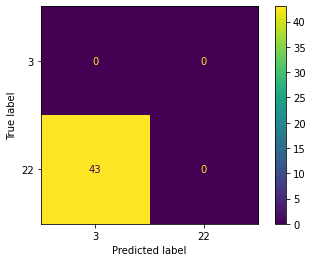

In [42]:
import svm_classifier as sv
path = r"E:\DATASET\note_event_dists"
x1_file = sv.get_inputs(path, ('003', ), 'ned')
x2_file = sv.get_inputs(path,('022', ), 'ned')
x1 = np.load(os.path.join(path, x1_file[0]))
x2 = np.load(os.path.join(path, x2_file[0]))
X = np.append(x1, x2, axis=0)
print(X.shape)
X_files = x1_file + x2_file
f1, prec, acc = sv.classify_svm_linear(path, X_files, y, thresh=0.0)

from joblib import load
model = load(r"E:\DATASET\models\ned_003.joblib")
X_Test = np.load(os.path.join(path, 'ned_042.npy'))
predicted = model.predict(X_Test)


print("Classification report for thee classifier: %s\n %s \n" %
      (model, metrics.classification_report(y_Test, predicted)))

disp = metrics.plot_confusion_matrix(model, X_Test, y_Test)

# PCD +  Note Event  Dists

Best accuracy: 0.911
$\epsilon$ = 0.0558
threshold = 0.25

In [50]:

x1 = np.load(r"E:\DATASET\audio_CFX\UniBiNoteDist_003_022_CFXthres49925eps558.npy")
X = x1[:, x1.shape[1]//2:]

y = np.load(os.path.join(du.copy_base,'DATASET_bin_Y.npy'))
X_Test = np.load(r"E:\DATASET\audio_CFX\UniBiNoteDist_042_CFXthres49925eps55.npy")
X_Test = X_Test[:, X_Test.shape[1]//2:]
y_Test = np.zeros(len(X_Test), dtype='int32')
y_Test = y_Test + 22
print(y_Test)


print(X.shape, y.shape, X_Test.shape, y_Test.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

[22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22
 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22]
(614, 20716) (614,) (43, 20716) (43,)
(552, 20716) (62, 20716) (552,) (62,)


0.9053837925061885
Classification report for thee classifier: SVC(kernel='linear')
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
          22       1.00      0.35      0.52        43

    accuracy                           0.35        43
   macro avg       0.50      0.17      0.26        43
weighted avg       1.00      0.35      0.52        43
 



    Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.


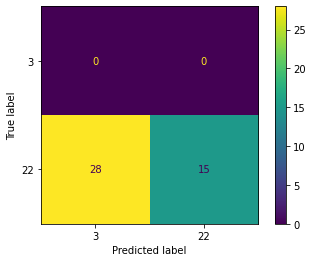

In [54]:

classifier = svm.SVC(kernel='linear')
f1 = []
for iter in range(10):
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    f = metrics.f1_score(y_test, pred, pos_label=y[0])
    f1.append(f)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True)

print(np.array(f1).sum() / len(f1))
predicted = classifier.predict(X_Test)

print("Classification report for thee classifier: %s\n %s \n" %
      (classifier, metrics.classification_report(y_Test, predicted)))

disp = metrics.plot_confusion_matrix(classifier, X_Test, y_Test)

# PCD + Note Event Dists (Without ChaosFEX

In [9]:
import numpy as np

arr = np.random.normal(0, 1, (12, 2585))
arr = arr.max(axis=0)
arr.shape

(2585,)

# Melody Augmentation(with ChaosFEX)
Best performance:
$f_1$ score = 0.87 $\pm$ 0.02
$\epsilon$  = 0.065
thresh = 0.25

2 files found! 
20 files found! 
Classification report for thee classifier: SVC(kernel='linear')
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
          22       1.00      0.30      0.46        43

    accuracy                           0.30        43
   macro avg       0.50      0.15      0.23        43
weighted avg       1.00      0.30      0.46        43
 



    Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.


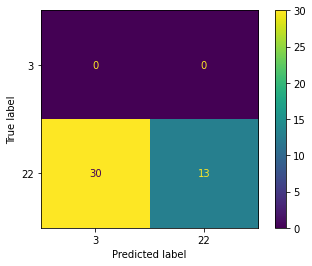

In [89]:
import os
import numpy as np
import svm_classifier as sv
from joblib import load

path = r"E:\DATASET\audio_CFX"
path_model = path.replace('audio_CFX', 'models')
X_Test_files = sv.get_inputs(path, ('042', ), 'Pitches', chaos=True)
X_Test = np.load(os.path.join(path, X_Test_files[-1]))
X_Test = X_Test[:, X_Test.shape[1]//2:]
models = sv.get_inputs(path_model, ('003', '022'), 'Pitches', chaos=True)
clf = load(os.path.join(path_model, models[15]))
predicted = clf.predict(X_Test)

print("Classification report for thee classifier: %s\n %s \n" %
      (clf, metrics.classification_report(y_Test, predicted)))

disp = metrics.plot_confusion_matrix(clf, X_Test, y_Test)

Performance: 0.85 $\pm$ 0.02
$\epsilon$  = 0.059
thresh = 0.499

2 files found! 
20 files found! 
Classification report for thee classifier: SVC(kernel='linear')
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
          22       1.00      0.23      0.38        43

    accuracy                           0.23        43
   macro avg       0.50      0.12      0.19        43
weighted avg       1.00      0.23      0.38        43
 



    Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.


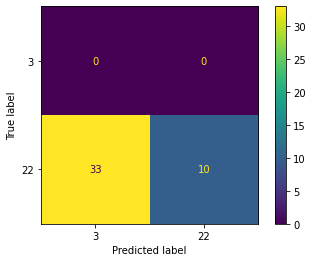

In [90]:
import os
import numpy as np
import svm_classifier as sv
from joblib import load

path = r"E:\DATASET\audio_CFX"
path_model = path.replace('audio_CFX', 'models')
X_Test_files = sv.get_inputs(path, ('042', ), 'Pitches', chaos=True)
X_Test = np.load(os.path.join(path, X_Test_files[0]))
X_Test = X_Test[:, :X_Test.shape[1]//2]
models = sv.get_inputs(path_model, ('003', '022'), 'Pitches', chaos=True)
clf = load(os.path.join(path_model, models[9]))
predicted = clf.predict(X_Test)

print("Classification report for thee classifier: %s\n %s \n" %
      (clf, metrics.classification_report(y_Test, predicted)))

disp = metrics.plot_confusion_matrix(clf, X_Test, y_Test)

# Melody Augmentation(without ChaosFEX)

Performance: 0.84 $\pm$ 0.02

1 files found! 
1 files found! 
Classification report for thee classifier: SVC(kernel='linear')
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
          22       1.00      0.30      0.46        43

    accuracy                           0.30        43
   macro avg       0.50      0.15      0.23        43
weighted avg       1.00      0.30      0.46        43
 



    Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.


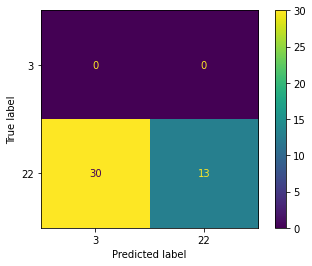

In [86]:
import os
import numpy as np
import svm_classifier as sv
from joblib import load

path = r"E:\DATASET\dom_scale_inv"
path_model = path.replace('dom_scale_inv', 'models')
X_Test_files = sv.get_inputs(path, ('042', ), 'pitches')
x_Test = np.load(os.path.join(path, X_Test_files[0]))
X_Test = x_Test.reshape((x_Test.shape[0], x_Test.shape[1]*x_Test.shape[2]))
# X_Test.shape
# X_Test = X_Test[:, X_Test.shape[1]//2:]
models = sv.get_inputs(path_model, ('003', ), 'pitches')
clf = load(os.path.join(path_model, models[0]))
predicted = clf.predict(X_Test)
y_Test = y_Test[:43]
print("Classification report for thee classifier: %s\n %s \n" %
      (clf, metrics.classification_report(y_Test, predicted)))

disp = metrics.plot_confusion_matrix(clf, X_Test, y_Test)

1 files found! 
(46, 48)
2 files found! 
['Śankarābharaṇaṁ', 'Śankarābharaṇaṁ', 'Śankarābharaṇaṁ', 'Śankarābharaṇaṁ', 'Śankarābharaṇaṁ', 'Śankarābharaṇaṁ', 'Śankarābharaṇaṁ', 'Śankarābharaṇaṁ', 'Śankarābharaṇaṁ', 'Śankarābharaṇaṁ', 'Śankarābharaṇaṁ', 'Śankarābharaṇaṁ', 'Śankarābharaṇaṁ', 'Śankarābharaṇaṁ', 'Śankarābharaṇaṁ', 'Śankarābharaṇaṁ', 'Śankarābharaṇaṁ', 'Śankarābharaṇaṁ', 'Śankarābharaṇaṁ', 'Śankarābharaṇaṁ', 'Śankarābharaṇaṁ', 'Śankarābharaṇaṁ', 'Śankarābharaṇaṁ', 'Śankarābharaṇaṁ', 'Śankarābharaṇaṁ', 'Śankarābharaṇaṁ', 'Śankarābharaṇaṁ', 'Śankarābharaṇaṁ', 'Śankarābharaṇaṁ', 'Śankarābharaṇaṁ', 'Śankarābharaṇaṁ', 'Śankarābharaṇaṁ', 'Śankarābharaṇaṁ', 'Śankarābharaṇaṁ', 'Śankarābharaṇaṁ', 'Śankarābharaṇaṁ', 'Śankarābharaṇaṁ', 'Śankarābharaṇaṁ', 'Śankarābharaṇaṁ', 'Śankarābharaṇaṁ', 'Śankarābharaṇaṁ', 'Śankarābharaṇaṁ', 'Śankarābharaṇaṁ', 'Śankarābharaṇaṁ', 'Śankarābharaṇaṁ', 'Śankarābharaṇaṁ'] ['Bhairavi' 'Śankarābharaṇaṁ' 'Śankarābharaṇaṁ' 'Śankarābharaṇaṁ'
 'Śankarābharaṇaṁ'

    Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.


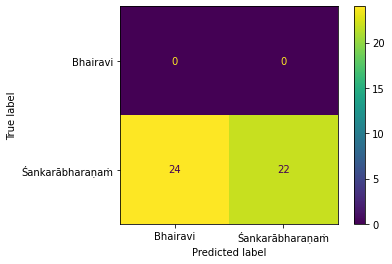

In [84]:
import os
import numpy as np
import svm_classifier as sv
from joblib import load

path = r"E:\DATASET\audio_CFX"
path_model = path.replace('audio_CFX', 'models')
X_Test_files = sv.get_inputs(path, ('041', ), 'pcdUni', chaos=True)
x_Test = np.load(os.path.join(path, X_Test_files[0]))
# X_Test = x_Test.reshape((x_Test.shape[0], x_Test.shape[1]*x_Test.shape[2]))
X_Test = x_Test[:, :x_Test.shape[1]//2]
print(X_Test.shape)
models = sv.get_inputs(path_model, ('003', '022' ), 'pcdUni', chaos=True)
clf = load(os.path.join(path_model, models[0]))
predicted = clf.predict(X_Test)
y_Test_ = ['Śankarābharaṇaṁ' if y == 22 else 'Bhairavi' for y in y_Test]
print(y_Test_, predicted)
print("Classification report for thee classifier: %s\n %s \n" %
      (clf, metrics.classification_report(y_Test_, predicted)))

disp = metrics.plot_confusion_matrix(clf, X_Test, y_Test_)